In [3]:
pip install tensorflow

Note: you may need to restart the kernel to use updated packages.


In [4]:
import os
import librosa
import numpy as np
from sklearn.model_selection import train_test_split
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout, BatchNormalization
from tensorflow.keras.optimizers import Adam
from sklearn.preprocessing import LabelEncoder
from tensorflow.keras.utils import to_categorical
import re
import shutil
source_dir = 'C:/Users/dskha/Downloads/archive/train/train'
languages = {
    'en': re.compile('^en', re.IGNORECASE),  # English
    'es': re.compile('^es', re.IGNORECASE),  # spanish
    'de': re.compile('^de', re.IGNORECASE),  # German
    
}

In [5]:
def load_data(source_dir, languages):
    data_files = []
    labels = []
    for language in languages:
        for data_file in os.listdir(source_dir):
            if data_file.startswith(language) and data_file.endswith(".flac"):
                data_files.append(os.path.join(source_dir, data_file))
                labels.append(language)
    return data_files, labels

In [6]:
data_files, labels = load_data(source_dir, languages)

In [7]:
import librosa
import numpy as np

# Function to extract MFCCs from audio files
def extract_features(data_file):
    audio, sample_rate = librosa.load(data_file)
    mfcc = librosa.feature.mfcc(y=audio, sr=sample_rate, n_mfcc=128)
    return np.mean(mfcc.T, axis=0)

In [8]:
features = [extract_features(data_file) for data_file in data_files]

In [10]:
# Encode labels as integers
encoder = LabelEncoder()
integer_labels = encoder.fit_transform(labels)

In [11]:
import numpy as np
from sklearn.model_selection import train_test_split

# Assuming features and integer_labels are lists
features = np.array(features)
integer_labels = np.array(integer_labels)

# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(features, integer_labels, test_size=0.3, random_state=42)


In [12]:
# Print the shapes
print("X_train shape:", X_train.shape)
print("y_train shape:", y_train.shape)

X_train shape: (29988, 128)
y_train shape: (29988,)


In [13]:
# Convert labels to one-hot encoding
y_train = to_categorical(y_train, num_classes=len(languages))
y_test = to_categorical(y_test, num_classes=len(languages))

In [14]:
# Define the model
model = Sequential()
model.add(Dense(128, input_shape=(128,), activation='relu'))
model.add(Dropout(0.5))
model.add(BatchNormalization())
model.add(Dense(64, activation='relu'))
model.add(Dropout(0.5))
model.add(BatchNormalization())
model.add(Dense(3, activation='softmax'))
model.compile(optimizer=Adam(learning_rate=0.0001), loss='categorical_crossentropy', metrics=['accuracy', 'Precision', 'Recall', 'AUC'])

In [15]:
# Train the model
history=model.fit(X_train, y_train, epochs=50, batch_size=16, validation_data=(X_test, y_test))

Epoch 1/50


1875/1875 [==============================] - 14s 6ms/step - loss: 1.4020 - accuracy: 0.3667 - precision: 0.3708 - recall: 0.2808 - auc: 0.5375 - val_loss: 1.0471 - val_accuracy: 0.4379 - val_precision: 0.5087 - val_recall: 0.3010 - val_auc: 0.6470
Epoch 2/50
1875/1875 [==============================] - 12s 6ms/step - loss: 1.1918 - accuracy: 0.4070 - precision: 0.4293 - recall: 0.2794 - auc: 0.5867 - val_loss: 0.9785 - val_accuracy: 0.5002 - val_precision: 0.6326 - val_recall: 0.3017 - val_auc: 0.7026
Epoch 3/50
1875/1875 [==============================] - 11s 6ms/step - loss: 1.0955 - accuracy: 0.4406 - precision: 0.4887 - recall: 0.2732 - auc: 0.6237 - val_loss: 0.9426 - val_accuracy: 0.5293 - val_precision: 0.7115 - val_recall: 0.3161 - val_auc: 0.7347
Epoch 4/50
1875/1875 [==============================] - 11s 6ms/step - loss: 1.0373 - accuracy: 0.4739 - precision: 0.5479 - recall: 0.2740 - auc: 0.6583 - val_loss: 0.9155 - val_accuracy: 0.5577 - val_precision: 0.7480 -

In [16]:
# Evaluate the model
loss, accuracy, precision, recall, auc = model.evaluate(X_test, y_test)
print(f'Loss: {loss}, Accuracy: {accuracy}, Precision: {precision}, Recall: {recall}, AUC: {auc}')
from sklearn.metrics import confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

402/402 [==============================] - 1s 3ms/step - loss: 0.3602 - accuracy: 0.9053 - precision: 0.9431 - recall: 0.8325 - auc: 0.9800
Loss: 0.3601750433444977, Accuracy: 0.9053065776824951, Precision: 0.9430586099624634, Recall: 0.8324774503707886, AUC: 0.9800187945365906


In [17]:
# Assuming y_test is one-hot encoded, convert it back to integer labels
y_true_labels = np.argmax(y_test, axis=1)


In [18]:
# Get predictions from the model
y_pred = np.argmax(model.predict(X_test), axis=1)

402/402 [==============================] - 1s 2ms/step


In [19]:
# Create confusion matrix
labels = ['English', 'German', 'Spanish']
cm = confusion_matrix(y_true_labels, y_pred, labels=range(5))  # Adjust the number of labels based on your problem

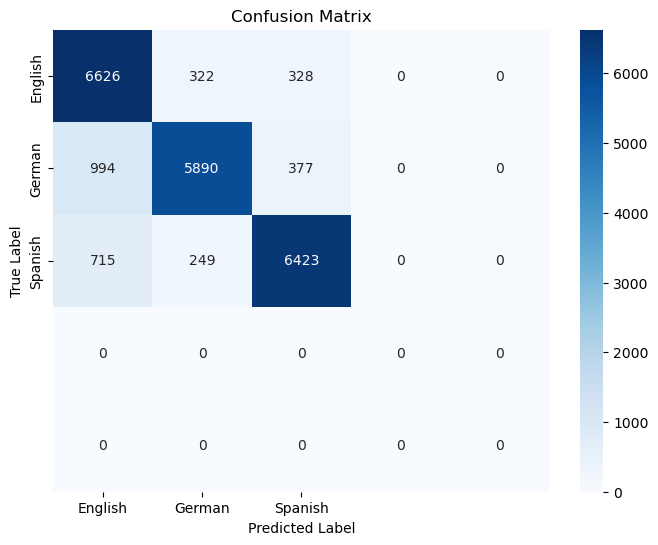

In [46]:
# Plot confusion matrix using seaborn
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=labels, yticklabels=labels)  # Adjust the number of labels
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.title('Confusion Matrix')
plt.show()

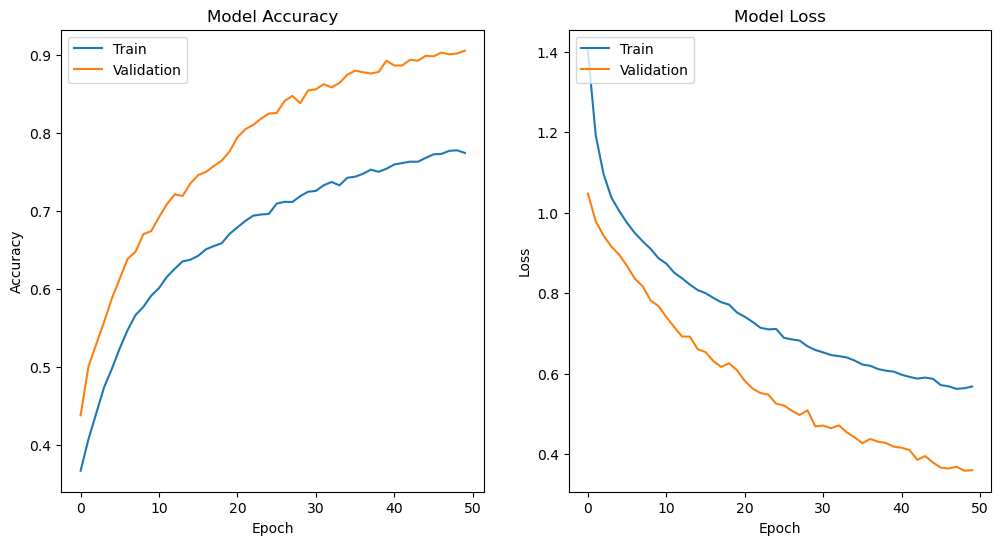

In [20]:
model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])
plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Model Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend(['Train', 'Validation'], loc='upper left')

plt.subplot(1, 2, 2)
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend(['Train', 'Validation'], loc='upper left')
plt.show()